# 1 Missing data basics

## 1.1 When / why does data decome missing?

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f', 'h'],columns=['one', 'two', 'three'])
df

,one,two,three
a,-0.652436,0.240897,1.200754
c,-0.793124,-0.098839,0.706078
e,0.018390,0.771831,1.158039
f,0.042168,1.111142,2.505619
h,-0.569405,0.911708,-1.315003


In [3]:
df['four'] = 'bar'

In [4]:
df['five'] = df['one'] > 0
df

,one,two,three,four,five
a,-0.652436,0.240897,1.200754,bar,False
c,-0.793124,-0.098839,0.706078,bar,False
e,0.018390,0.771831,1.158039,bar,True
f,0.042168,1.111142,2.505619,bar,True
h,-0.569405,0.911708,-1.315003,bar,False


In [5]:
df2 = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
df2

,one,two,three,four,five
a,-0.652436,0.240897,1.200754,bar,False
b,NaN,NaN,NaN,NaN,NaN
c,-0.793124,-0.098839,0.706078,bar,False
d,NaN,NaN,NaN,NaN,NaN
e,0.018390,0.771831,1.158039,bar,True
f,0.042168,1.111142,2.505619,bar,True
g,NaN,NaN,NaN,NaN,NaN
h,-0.569405,0.911708,-1.315003,bar,False


## 1.2 Values considered "missing"

In [6]:
df2['one']

a   -0.652436
b         NaN
c   -0.793124
d         NaN
e    0.018390
f    0.042168
g         NaN
h   -0.569405
Name: one, dtype: float64

In [7]:
pd.isna(df2['one'])

a    False
b     True
c    False
d     True
e    False
f    False
g     True
h    False
Name: one, dtype: bool

In [8]:
df2['four'].notna()

a     True
b    False
c     True
d    False
e     True
f     True
g    False
h     True
Name: four, dtype: bool

In [9]:
df2.isna()

,one,two,three,four,five
a,False,False,False,False,False
b,True,True,True,True,True
c,False,False,False,False,False
d,True,True,True,True,True
e,False,False,False,False,False
f,False,False,False,False,False
g,True,True,True,True,True
h,False,False,False,False,False


In [10]:
None == None

True

In [11]:
np.nan == np.nan

False

In [12]:
df2['one'] == np.nan

a    False
b    False
c    False
d    False
e    False
f    False
g    False
h    False
Name: one, dtype: bool

## 1.3 Datetimes

In [13]:
df

,one,two,three,four,five
a,-0.652436,0.240897,1.200754,bar,False
c,-0.793124,-0.098839,0.706078,bar,False
e,0.018390,0.771831,1.158039,bar,True
f,0.042168,1.111142,2.505619,bar,True
h,-0.569405,0.911708,-1.315003,bar,False


In [14]:
df2 = df.copy()

In [15]:
df2['timestamp'] = pd.Timestamp('20120101'); df2

,one,two,three,four,five,timestamp
a,-0.652436,0.240897,1.200754,bar,False,2012-01-01
c,-0.793124,-0.098839,0.706078,bar,False,2012-01-01
e,0.018390,0.771831,1.158039,bar,True,2012-01-01
f,0.042168,1.111142,2.505619,bar,True,2012-01-01
h,-0.569405,0.911708,-1.315003,bar,False,2012-01-01


In [16]:
df2.loc[['a', 'c', 'h'], ['one', 'timestamp']] = np.nan
df2

,one,two,three,four,five,timestamp
a,NaN,0.240897,1.200754,bar,False,NaT
c,NaN,-0.098839,0.706078,bar,False,NaT
e,0.018390,0.771831,1.158039,bar,True,2012-01-01
f,0.042168,1.111142,2.505619,bar,True,2012-01-01
h,NaN,0.911708,-1.315003,bar,False,NaT


In [17]:
df2.get_dtype_counts()

bool              1
datetime64[ns]    1
float64           3
object            1
dtype: int64

## 1.4 Inserting missing data

In [18]:
s = pd.Series([1, 2, 3]);

In [19]:
s.loc[0] = None
s

0    NaN
1    2.0
2    3.0
dtype: float64

In [20]:
s = pd.Series(['a', 'b', 'c'])

In [21]:
s.loc[0] = None

In [22]:
s.loc[1] = np.nan

In [23]:
s

0    None
1     NaN
2       c
dtype: object

# 2 Cleaning / filling missing data

In [28]:
df2

,one,two,three,four,five,timestamp
a,NaN,0.240897,1.200754,bar,False,NaT
c,NaN,-0.098839,0.706078,bar,False,NaT
e,0.018390,0.771831,1.158039,bar,True,2012-01-01
f,0.042168,1.111142,2.505619,bar,True,2012-01-01
h,NaN,0.911708,-1.315003,bar,False,NaT


In [25]:
df2.fillna(0)

,one,two,three,four,five,timestamp
a,0.000000,0.240897,1.200754,bar,False,0
c,0.000000,-0.098839,0.706078,bar,False,0
e,0.018390,0.771831,1.158039,bar,True,2012-01-01 00:00:00
f,0.042168,1.111142,2.505619,bar,True,2012-01-01 00:00:00
h,0.000000,0.911708,-1.315003,bar,False,0


In [26]:
df2['four'].fillna('missing')

a    bar
c    bar
e    bar
f    bar
h    bar
Name: four, dtype: object

In [29]:
df2

,one,two,three,four,five,timestamp
a,NaN,0.240897,1.200754,bar,False,NaT
c,NaN,-0.098839,0.706078,bar,False,NaT
e,0.018390,0.771831,1.158039,bar,True,2012-01-01
f,0.042168,1.111142,2.505619,bar,True,2012-01-01
h,NaN,0.911708,-1.315003,bar,False,NaT


In [30]:
df2.fillna(method='pad')

,one,two,three,four,five,timestamp
a,NaN,0.240897,1.200754,bar,False,NaT
c,NaN,-0.098839,0.706078,bar,False,NaT
e,0.018390,0.771831,1.158039,bar,True,2012-01-01
f,0.042168,1.111142,2.505619,bar,True,2012-01-01
h,0.042168,0.911708,-1.315003,bar,False,2012-01-01


### 2.1 Filling with a PandasObject

In [34]:
dff = pd.DataFrame(np.random.randn(10,3), columns=list('ABC')); dff

,A,B,C
0,-0.022196,-0.748584,0.191725
1,0.979863,-1.769878,-1.974309
2,0.262347,0.478826,-0.603734
3,-0.198371,0.740674,-0.210331
4,-0.522397,-1.819194,0.803425
5,-1.323165,-0.626345,-0.118109
6,1.135944,1.431725,0.937732
7,-0.960687,-0.021553,0.427828
8,0.396126,0.284632,2.123164
9,2.445518,-0.939278,0.422981


In [35]:
dff.iloc[3:5, 0] = np.nan
dff.iloc[4:6, 1] = np.nan
dff.iloc[5:8, 2] = np.nan

In [36]:
dff

,A,B,C
0,-0.022196,-0.748584,0.191725
1,0.979863,-1.769878,-1.974309
2,0.262347,0.478826,-0.603734
3,NaN,0.740674,-0.210331
4,NaN,NaN,0.803425
5,-1.323165,NaN,NaN
6,1.135944,1.431725,NaN
7,-0.960687,-0.021553,NaN
8,0.396126,0.284632,2.123164
9,2.445518,-0.939278,0.422981


In [37]:
dff.fillna(dff.mean())

,A,B,C
0,-0.022196,-0.748584,0.191725
1,0.979863,-1.769878,-1.974309
2,0.262347,0.478826,-0.603734
3,0.364219,0.740674,-0.210331
4,0.364219,-0.067930,0.803425
5,-1.323165,-0.067930,0.107560
6,1.135944,1.431725,0.107560
7,-0.960687,-0.021553,0.107560
8,0.396126,0.284632,2.123164
9,2.445518,-0.939278,0.422981


In [38]:
dff.where(pd.notna(dff), dff.mean(), axis='columns')

,A,B,C
0,-0.022196,-0.748584,0.191725
1,0.979863,-1.769878,-1.974309
2,0.262347,0.478826,-0.603734
3,0.364219,0.740674,-0.210331
4,0.364219,-0.067930,0.803425
5,-1.323165,-0.067930,0.107560
6,1.135944,1.431725,0.107560
7,-0.960687,-0.021553,0.107560
8,0.396126,0.284632,2.123164
9,2.445518,-0.939278,0.422981


### 2.2 Dropping axis labels with missing data: dropna

In [41]:
df['one'] = np.nan

In [42]:
df

,one,two,three,four,five
a,NaN,0.240897,1.200754,bar,False
c,NaN,-0.098839,0.706078,bar,False
e,NaN,0.771831,1.158039,bar,True
f,NaN,1.111142,2.505619,bar,True
h,NaN,0.911708,-1.315003,bar,False


In [43]:
df.dropna(axis=0)

,one,two,three,four,five


In [44]:
df.dropna(axis=1)

,two,three,four,five
a,0.240897,1.200754,bar,False
c,-0.098839,0.706078,bar,False
e,0.771831,1.158039,bar,True
f,1.111142,2.505619,bar,True
h,0.911708,-1.315003,bar,False


In [45]:
df['one'].dropna()

Series([], Name: one, dtype: float64)

### 2.3 Interpolation

In [49]:
ts = pd.Series(np.random.randn(100), index=pd.date_range('20000101', periods=100))

In [51]:
ts[10:66] = np.nan

In [52]:
ts

2000-01-01    0.076740
2000-01-02   -0.201510
2000-01-03    0.208944
2000-01-04   -1.041328
2000-01-05    0.801330
2000-01-06   -1.632345
2000-01-07   -0.321438
2000-01-08    1.407270
2000-01-09   -0.900131
2000-01-10    0.328824
2000-01-11         NaN
2000-01-12         NaN
2000-01-13         NaN
2000-01-14         NaN
2000-01-15         NaN
2000-01-16         NaN
2000-01-17         NaN
2000-01-18         NaN
2000-01-19         NaN
2000-01-20         NaN
2000-01-21         NaN
2000-01-22         NaN
2000-01-23         NaN
2000-01-24         NaN
2000-01-25         NaN
2000-01-26         NaN
2000-01-27         NaN
2000-01-28         NaN
2000-01-29         NaN
2000-01-30         NaN
                ...   
2000-03-11    1.002200
2000-03-12   -0.878226
2000-03-13    1.405634
2000-03-14   -0.135665
2000-03-15   -0.135900
2000-03-16   -0.028440
2000-03-17   -0.546764
2000-03-18   -1.154583
2000-03-19   -0.101792
2000-03-20    0.031295
2000-03-21   -0.613891
2000-03-22    0.754068
2000-03-23 

In [53]:
ts.count() # este método desconsidera os NaN (not a number)

44

In [55]:
ts.interpolate().count() # conta todos os registros

100

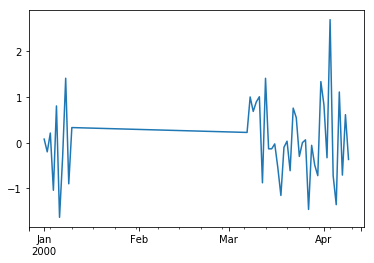

In [57]:
%matplotlib inline
ts.interpolate().plot()

In [58]:
ts.interpolate(method='time')

2000-01-01    0.076740
2000-01-02   -0.201510
2000-01-03    0.208944
2000-01-04   -1.041328
2000-01-05    0.801330
2000-01-06   -1.632345
2000-01-07   -0.321438
2000-01-08    1.407270
2000-01-09   -0.900131
2000-01-10    0.328824
2000-01-11    0.326957
2000-01-12    0.325089
2000-01-13    0.323221
2000-01-14    0.321354
2000-01-15    0.319486
2000-01-16    0.317618
2000-01-17    0.315751
2000-01-18    0.313883
2000-01-19    0.312016
2000-01-20    0.310148
2000-01-21    0.308280
2000-01-22    0.306413
2000-01-23    0.304545
2000-01-24    0.302677
2000-01-25    0.300810
2000-01-26    0.298942
2000-01-27    0.297075
2000-01-28    0.295207
2000-01-29    0.293339
2000-01-30    0.291472
                ...   
2000-03-11    1.002200
2000-03-12   -0.878226
2000-03-13    1.405634
2000-03-14   -0.135665
2000-03-15   -0.135900
2000-03-16   -0.028440
2000-03-17   -0.546764
2000-03-18   -1.154583
2000-03-19   -0.101792
2000-03-20    0.031295
2000-03-21   -0.613891
2000-03-22    0.754068
2000-03-23 

In [59]:
 ser = pd.Series([np.nan, np.nan, 5, np.nan, np.nan, np.nan, 13])

In [60]:
ser.interpolate(limit=2)

0     NaN
1     NaN
2     5.0
3     7.0
4     9.0
5     NaN
6    13.0
dtype: float64

### 2.4 Replacing Generic Values

In [61]:
ser = pd.Series([0., 1., 2., 3., 4.])

In [63]:
ser.replace(0, 5) # troca no indice 0 para o valor 5

0    5.0
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

In [64]:
 ser.replace([0, 1, 2, 3, 4], [4, 3, 2, 1, 0]) # replace multiplos

0    4.0
1    3.0
2    2.0
3    1.0
4    0.0
dtype: float64

In [65]:
ser.replace({0: 10, 1: 100}) # trplace através de um dicionário

0     10.0
1    100.0
2      2.0
3      3.0
4      4.0
dtype: float64

### 2.5 Missing data casting rules and indexing

In [66]:
s = pd.Series(np.random.randn(5), index=[0, 2, 4, 6, 7])

In [67]:
s > 0

0     True
2    False
4     True
6     True
7    False
dtype: bool

In [68]:
(s > 0).dtype

dtype('bool')

In [69]:
crit = (s > 0).reindex(list(range(8)))
crit

0     True
1      NaN
2    False
3      NaN
4     True
5      NaN
6     True
7    False
dtype: object

In [70]:
crit.dtype

dtype('O')

In [71]:
reindexed = s.reindex(list(range(8))).fillna(0)

In [72]:
reindexed[crit.fillna(False)]

0    0.087207
4    1.233975
6    0.719698
dtype: float64

In [74]:
 reindexed[crit.fillna(True)]

0    0.087207
1    0.000000
3    0.000000
4    1.233975
5    0.000000
6    0.719698
dtype: float64